<a href="https://colab.research.google.com/github/Pengyu-gis/MyDeepLearing/blob/main/mobilenet_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [2]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
import requests

In [24]:
url = "https://images.unsplash.com/photo-1597466599360-3b9775841aec?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8ZGlzbmV5JTIwY2FzdGxlfGVufDB8fDB8fA%3D%3D&w=1000&q=80"
image = Image.open(requests.get(url, stream=True).raw)

In [12]:
preprocessor = AutoImageProcessor.from_pretrained("google/mobilenet_v1_0.75_192")
model = AutoModelForImageClassification.from_pretrained("google/mobilenet_v1_0.75_192")

In [25]:
inputs = preprocessor(images=image, return_tensors="pt")

outputs = model(**inputs)
logits = outputs.logits

In [27]:
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
predicted_class_label = model.config.id2label[predicted_class_idx]
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: castle


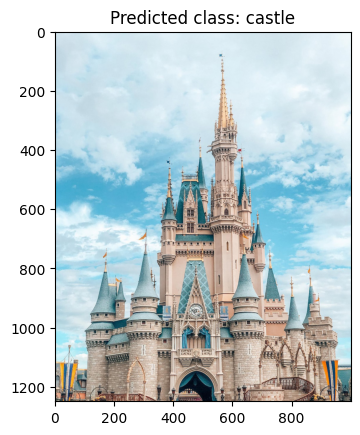

In [29]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.axis("on")
plt.title(f"Predicted class: {predicted_class_label}")
plt.show()